<a href="https://colab.research.google.com/github/Lounes-Kheris98/diabete.predict/blob/main/Predict_Diabets_OA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#Step 1:
#Use of Pandas + Matplotlib libraries  
#to understand our Dataset (Reading data of our Dataset)

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files 

In [6]:
uploaded = files.upload()

Saving diabetes.csv to diabetes (1).csv


In [7]:
dataset = pd.read_csv('diabetes.csv')
dataset.head(n=5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
#Our dataset contains 768 rows and 9 columns 
dataset.shape

(768, 9)

In [9]:
#The columns of our Dataset:
#Describe the columns?
dataset.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [10]:
#No missing value in our dataset
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [11]:
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [12]:
#Number of elements in our dataset (number of points)
dataset.size

6912

In [13]:
#Statistical description of our dataset
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [14]:
#We have 268 patients who are diabetic and the other 500 not
dataset.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [15]:
#Step 2 : Data visualization

Text(0, 0.5, 'Count')

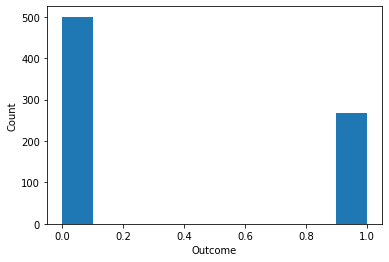

In [16]:
#A histogram showing the number of people with and without diabetes
plt.hist(dataset['Outcome'])
plt.xlabel('Outcome')
plt.ylabel('Count')

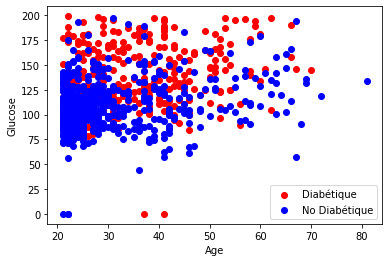

In [17]:
plt.scatter(dataset[dataset.Outcome==1].Age,dataset[dataset.Outcome==1].Glucose,label="Diabétique",c="r")
plt.scatter(dataset[dataset.Outcome==0].Age,dataset[dataset.Outcome==0].Glucose,label="No Diabétique",c="b")
plt.xlabel("Age")
plt.ylabel("Glucose")
plt.legend()

In [18]:
dataset['Age'].max()

81

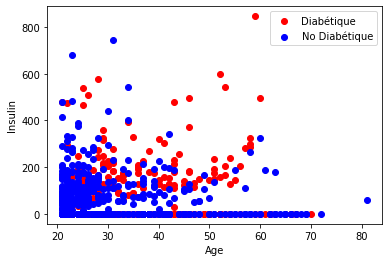

In [19]:
plt.scatter(dataset[dataset.Outcome==1].Age,dataset[dataset.Outcome==1].Insulin,label="Diabétique",c="r")
plt.scatter(dataset[dataset.Outcome==0].Age,dataset[dataset.Outcome==0].Insulin,label="No Diabétique",c="b")
plt.xlabel("Age")
plt.ylabel("Insulin")
plt.legend()

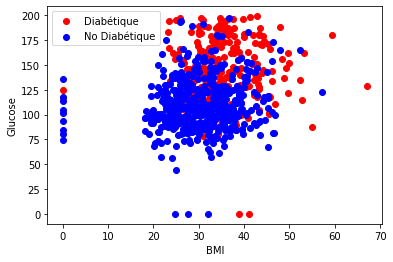

In [20]:
plt.scatter(dataset[dataset.Outcome==1].BMI,dataset[dataset.Outcome==1].Glucose,label="Diabétique",c="r")
plt.scatter(dataset[dataset.Outcome==0].BMI,dataset[dataset.Outcome==0].Glucose,label="No Diabétique",c="b")
plt.xlabel("BMI")
plt.ylabel("Glucose")
plt.legend()

Text(0, 0.5, 'BloodPressure')

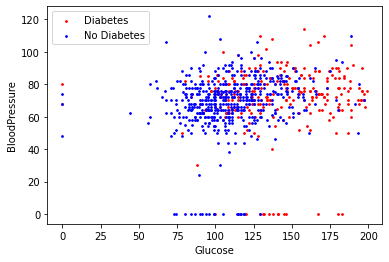

In [21]:
plt.scatter(dataset[dataset.Outcome==1].Glucose,dataset[dataset.Outcome==1].BloodPressure,label='Diabetes',color='r',s=3)
plt.scatter(dataset[dataset.Outcome==0].Glucose,dataset[dataset.Outcome==0].BloodPressure,label='No Diabetes',color='b',s=3)
plt.legend()
plt.xlabel('Glucose')
plt.ylabel('BloodPressure')

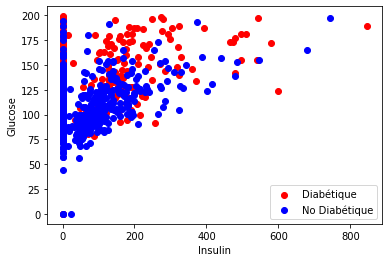

In [22]:
plt.scatter(dataset[dataset.Outcome==1].Insulin,dataset[dataset.Outcome==1].Glucose,label="Diabétique",c="r")
plt.scatter(dataset[dataset.Outcome==0].Insulin,dataset[dataset.Outcome==0].Glucose,label="No Diabétique",c="b")
plt.xlabel("Insulin")
plt.ylabel("Glucose")
plt.legend()

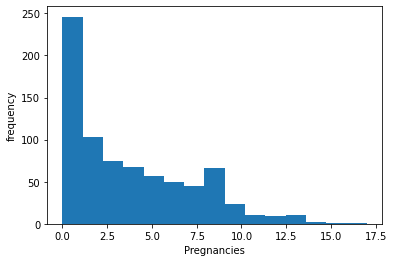

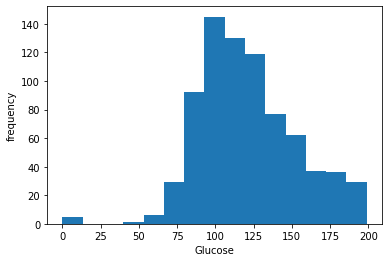

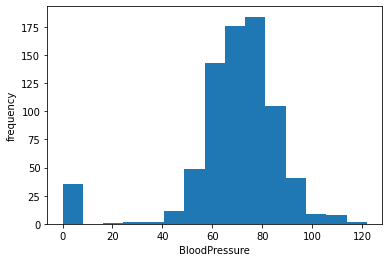

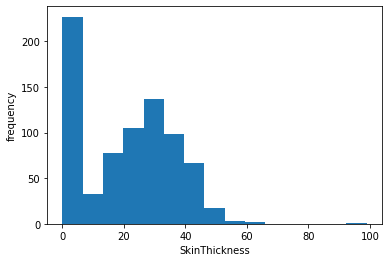

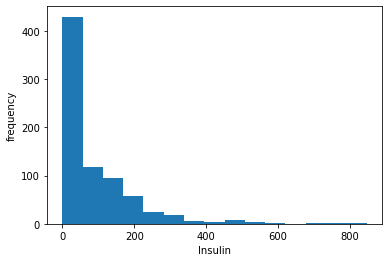

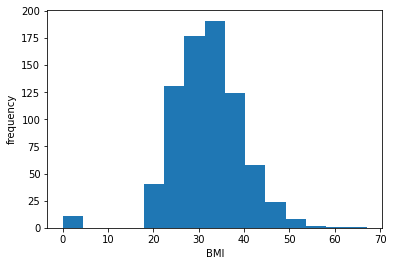

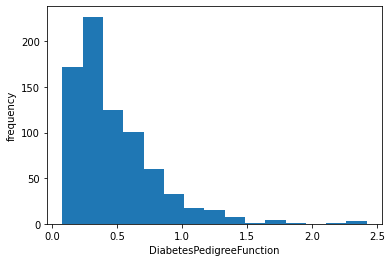

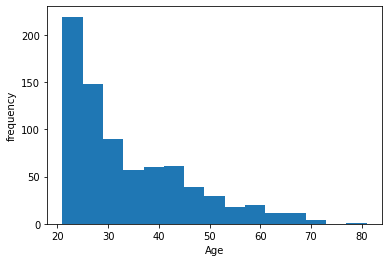

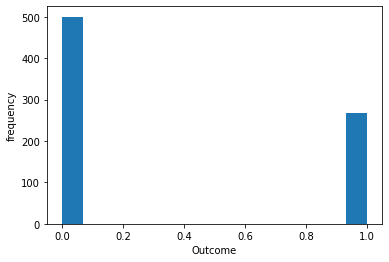

In [23]:
for c in dataset.columns:
    plt.figure()
    plt.hist(dataset[c],bins=15)
    plt.xlabel(c)
    plt.ylabel('frequency')
    plt.show()

In [24]:
#Step 3: Data Preprocessing

In [25]:
dataset_new = dataset
liste = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
dataset_new[liste] = dataset_new[liste].replace(0, np.NaN)

In [26]:
# Count of NaN
dataset_new.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [27]:
dataset_new.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [28]:
#Replacing Nan with mean values of colomns 
for i in liste:
    dataset_new[i].fillna(dataset_new["Glucose"].mean(), inplace = True)
dataset_new.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,121.686763,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,121.686763,26.6,0.351,31,0
2,8,183.0,64.0,121.686763,121.686763,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


In [29]:
#Décomposition de notre dataset (train + test)
import sklearn
from sklearn.model_selection import train_test_split
train,test=train_test_split(dataset,test_size=0.35,random_state=0) 


In [30]:
train.count()

Pregnancies                 499
Glucose                     499
BloodPressure               499
SkinThickness               499
Insulin                     499
BMI                         499
DiabetesPedigreeFunction    499
Age                         499
Outcome                     499
dtype: int64

In [31]:
train.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000
mean,3.801603,122.919333,75.084386,55.753922,143.456197,34.041872,0.469078,33.460922,0.358717
std,3.333943,30.661929,15.678998,42.773269,91.463117,13.194074,0.337401,11.902380,0.480105
min,0.000000,57.000000,30.000000,7.000000,14.000000,18.200000,0.084000,21.000000,0.000000
25%,1.000000,100.000000,65.000000,25.000000,121.686763,27.600000,0.237000,24.000000,0.000000
50%,3.000000,120.000000,74.000000,34.000000,121.686763,32.800000,0.368000,29.000000,0.000000
75%,6.000000,143.000000,82.000000,121.686763,140.000000,36.900000,0.611000,40.500000,1.000000
max,15.000000,198.000000,122.000000,121.686763,846.000000,121.686763,2.420000,81.000000,1.000000


In [32]:
test.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000
mean,3.925651,119.400323,73.847316,57.894751,130.900398,33.167139,0.477067,32.832714,0.330855
std,3.439516,29.934450,16.238324,43.901575,76.557257,11.550199,0.320314,11.502672,0.471398
min,0.000000,44.000000,24.000000,8.000000,16.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,25.000000,115.000000,27.100000,0.252000,24.000000,0.000000
50%,3.000000,113.000000,72.000000,36.000000,121.686763,32.000000,0.376000,28.000000,0.000000
75%,6.000000,137.000000,80.000000,121.686763,121.686763,36.800000,0.640000,41.000000,1.000000
max,17.000000,199.000000,121.686763,121.686763,680.000000,121.686763,1.893000,70.000000,1.000000


In [33]:
#Application de l'algorithme knn

